# Chapter5 : Deep learning for computer vision

## 5.2 Training a convnet from scratch on a small dataset

### 5.2.1 The relevance of deep learning for small-data problems

You'll sometimes hear that deep learning only works when lots of data is available. This is valid in part. It isn't possible to train a convnet to solve a complex problem with just a few tens of samples, but a few hundred can potentially suffice if the model is small and well regularized and the task is simple. Training a convnet from scratch on a very small image dataset will still yield reasonable results despite a relative lack of data, without the need for any custom feature engineering.

### 5.2.2 Downloading the data

The Dogs vs. Cats dataset that you'll use isn't packaged with Keras. You can download the original dataset from www.kaggle.com/c/dogs-vs-cats/data.

After downloading and uncompressing it, you'll create a new dataset containing three subsets: a training set with 1,000 samples of each class, a validation set with 500 samples of each class, and a test set with 500 samples of each class.

In [ ]:
import os, shutil

In [ ]:
# Path to the directory where the original dataset was uncompressed
original_dataset_dir = 'C:/Users/jeong/Desktop/DeepLearningWithPython/kaggle_original_data'

In [ ]:
# Directory where you'll store your smaller dataset
base_dir = 'C:/Users/jeong/Desktop/DeepLearningWithPython/cats_and_dogs_small'
os.mkdir(base_dir)  # create a directory

In [ ]:
# Directories for the training, validation, and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [ ]:
# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

In [ ]:
# Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

In [ ]:
# Directory with test cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with test dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [ ]:
# Copies the first 1,000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames :
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copies the first 1,000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames :
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
# Copies the next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames :
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copies the next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames :
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
# Copies the next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames :
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copies the next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames :
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

#### check if the pictures are split well in all three subsets (train/validation/test)

In [16]:
import os, shutil
base_dir = 'C:/Users/jeong/Desktop/DeepLearningWithPython/cats_and_dogs_small'

train_dir = os.path.join(base_dir, 'train')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_dir = os.path.join(base_dir, 'validation')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

test_dir = os.path.join(base_dir, 'test')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [17]:
print('Total training cat images:', len(os.listdir(train_cats_dir)))
print('Total training dog images:', len(os.listdir(train_dogs_dir)))
print('Total validation cat images:', len(os.listdir(validation_cats_dir)))
print('Total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('Total test cat images:', len(os.listdir(test_cats_dir)))
print('Total test dog images:', len(os.listdir(test_dogs_dir)))

Total training cat images: 1000
Total training dog images: 1000
Total validation cat images: 500
Total validation dog images: 500
Total test cat images: 500
Total test dog images: 500


Each split contains the same number of samples from each class: this is a balanced binary-classification problem, which means classification accuracy will be an appropriate measure of success.

### 5.2.3 Building your network

#### Instantiating a small convnet for dogs vs. cats classification

In [3]:
from keras import models
from keras import layers

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


In [5]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)             0         
__________

#### Configuring the model for training

In [7]:
from keras import optimizers

In [9]:
model.compile(optimizer = optimizers.RMSprop(lr = 1e-4),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

### 5.2.4 Data preprocessing

Currently, the data sits on a drive as JPEG files, so the steps for getting it into the network are roughly as follows:
  1. Read the picture files.
  2. Decode the JPEG content to RGB grids of pixels.
  3. Convert these into floating-point tensors.
  4. Rescale the pixel values (between 0 to 255) to the [0,1] interval.

#### Using ImageDataGenerator to read images from directories

In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
# Rescale all images by 1/255
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
     train_dir,   # target directory
     target_size = (150,150),   # resize all images to 150x150
     batch_size = 20,
     class_mode = 'binary')

validation_generator = train_datagen.flow_from_directory(
     validation_dir,   # target directory
     target_size = (150,150),   # resize all images to 150x150
     batch_size = 20,
     class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
for data_batch, labels_batch in train_generator :
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break   # the generator yield these batches indefinitely: 
             # it loops endlessly over the images in the target folder

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


#### Fitting the model using a batch generator

In [18]:
history = model.fit_generator(
     train_generator,
     steps_per_epoch = 100,
     epochs = 30,
     validation_data = validation_generator,
     validation_steps = 50)

Epoch 1/30
100/100 [==============================] - 130s 1s/step - loss: 0.5231 - acc: 0.7355 - val_loss: 0.5749 - val_acc: 0.7000
Epoch 2/30
100/100 [==============================] - 101s 1s/step - loss: 0.4822 - acc: 0.7660 - val_loss: 0.6516 - val_acc: 0.6600
Epoch 3/30
100/100 [==============================] - 111s 1s/step - loss: 0.4561 - acc: 0.7885 - val_loss: 0.6146 - val_acc: 0.6980
Epoch 4/30
100/100 [==============================] - 110s 1s/step - loss: 0.4215 - acc: 0.8115 - val_loss: 0.5980 - val_acc: 0.6990
Epoch 5/30
100/100 [==============================] - 110s 1s/step - loss: 0.3884 - acc: 0.8235 - val_loss: 0.5761 - val_acc: 0.7000
Epoch 6/30
100/100 [==============================] - 110s 1s/step - loss: 0.3671 - acc: 0.8410 - val_loss: 0.5770 - val_acc: 0.7190
Epoch 7/30
100/100 [==============================] - 112s 1s/step - loss: 0.3301 - acc: 0.8695 - val_loss: 0.6034 - val_acc: 0.7140
Epoch 8/30
100/100 [==============================] - 112s 1s/step - 

#### Saving the model

In [19]:
model.save('cats_and_dogs_small_1.h5')

#### Displaying curves of loss and accuracy during training

In [20]:
import matplotlib.pyplot as plt

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

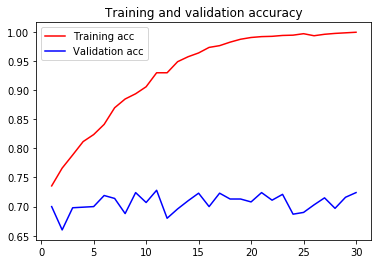

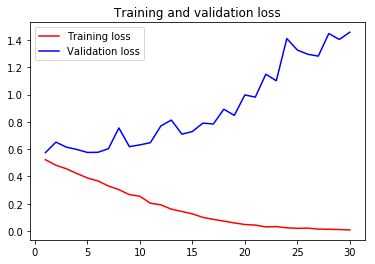

In [22]:
plt.plot(epochs, acc, 'r', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label ='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

> These plots are characteristic of overfitting. The training accuracy increases linearly over time, until it reaches nearly 100%, whereas the validation accuracy stalls at 70-72%.

Because you have relatively few training samples, overfitting will be your main concern. We're now going to work with a new one, specific to computer vision and used almost universally when processing images with deep-learning models: ***data augmentation***.

### 5.2.5 Using data augmentation

Data augmentation takes the approach of generating more training data from existing training samples, by *augmenting* the samples via a number of random transformations that yield believable-looking images.

The goal is that at training time, your model will never see that exact same picture twice. This helps expose the model to more aspects of the data and generalize better.

#### Setting up a data augmentation configuration via ImageDataGenerator

In [23]:
datagen = ImageDataGenerator(
     rotation_range = 40,
     width_shift_range = 0.2,
     height_shift_range = 0.2,
     shear_range = 0.2,
     zoom_range = 0.2,
     horizontal_flip = True,
     fill_mode = 'nearest')

#### Displaying some randomly augmented training images

In [24]:
from keras.preprocessing import image

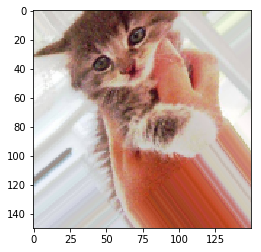

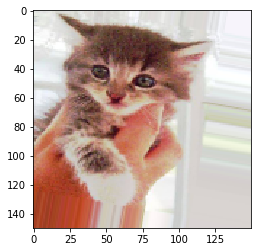

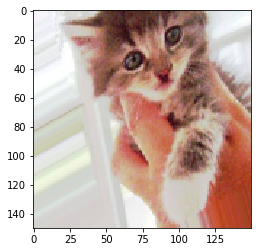

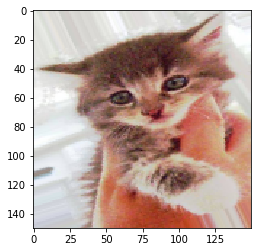

In [25]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# choose one image to augment
img_path = fnames[3]
img = image.load_img(img_path, target_size = (150,150))  # read image

x = image.img_to_array(img)     # converts it to a Numpy with shape (150,150,3)
x = x.reshape((1,) + x.shape)   # reshapes it to (1,150,150,3)

# generates batches of randomly transformed images
i = 0
for batch in datagen.flow(x, batch_size = 1) :
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0 :
        break    # loops indefinitely, so you need to break the loop at some point
plt.show()

The network will never see the same input twice. But the inputs is sees are still heavily intercorrelated, because they come from a small number of original images. As such, this may not be enough to completely get rid of overfitting. To further fight overfitting, you'll also add a *Dropout* layer to your model.

#### Defining a new convnet that includes dropout

In [26]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = optimizers.RMSprop(lr = 1e-4),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


#### Training the convnet using data-augmentation generators

In [28]:
train_datagen = ImageDataGenerator(
     rescale = 1./255,
     rotation_range = 40,
     width_shift_range = 0.2,
     height_shift_range = 0.2,
     shear_range = 0.2,
     zoom_range = 0.2,
     horizontal_flip = True,)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [29]:
train_generator = train_datagen.flow_from_directory(
     train_dir,
     target_size = (150,150),
     batch_size = 32,
     class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
     validation_dir,
     target_size = (150,150),
     batch_size = 32,
     class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [30]:
history = model.fit_generator(
     train_generator,
     steps_per_epoch = 100,
     epochs = 100,
     validation_data = validation_generator,
     validation_steps = 50)

Epoch 1/100
100/100 [==============================] - 158s 2s/step - loss: 0.6915 - acc: 0.5303 - val_loss: 0.6805 - val_acc: 0.5584
Epoch 2/100
100/100 [==============================] - 164s 2s/step - loss: 0.6793 - acc: 0.5687 - val_loss: 0.6756 - val_acc: 0.5760
Epoch 3/100
100/100 [==============================] - 168s 2s/step - loss: 0.6691 - acc: 0.5928 - val_loss: 0.6452 - val_acc: 0.6117
Epoch 4/100
100/100 [==============================] - 166s 2s/step - loss: 0.6442 - acc: 0.6316 - val_loss: 0.6296 - val_acc: 0.6250
Epoch 5/100
100/100 [==============================] - 171s 2s/step - loss: 0.6421 - acc: 0.6312 - val_loss: 0.5921 - val_acc: 0.6796
Epoch 6/100
100/100 [==============================] - 164s 2s/step - loss: 0.6185 - acc: 0.6591 - val_loss: 0.5917 - val_acc: 0.6649
Epoch 7/100
100/100 [==============================] - 182s 2s/step - loss: 0.6168 - acc: 0.6584 - val_loss: 0.5845 - val_acc: 0.6681
Epoch 8/100
100/100 [==============================] - 195s 2s

Epoch 62/100
100/100 [==============================] - 169s 2s/step - loss: 0.4183 - acc: 0.8066 - val_loss: 0.4176 - val_acc: 0.8179
Epoch 63/100
100/100 [==============================] - 169s 2s/step - loss: 0.4078 - acc: 0.8053 - val_loss: 0.4593 - val_acc: 0.7983
Epoch 64/100
100/100 [==============================] - 167s 2s/step - loss: 0.4140 - acc: 0.8119 - val_loss: 0.4420 - val_acc: 0.8041
Epoch 65/100
100/100 [==============================] - 166s 2s/step - loss: 0.4111 - acc: 0.8159 - val_loss: 0.5603 - val_acc: 0.7500
Epoch 66/100
100/100 [==============================] - 162s 2s/step - loss: 0.4106 - acc: 0.8078 - val_loss: 0.4391 - val_acc: 0.8035
Epoch 67/100
100/100 [==============================] - 168s 2s/step - loss: 0.4042 - acc: 0.8181 - val_loss: 0.4380 - val_acc: 0.8103
Epoch 68/100
100/100 [==============================] - 2503s 25s/step - loss: 0.3887 - acc: 0.8203 - val_loss: 0.4874 - val_acc: 0.7854
Epoch 69/100
100/100 [==============================]

#### Saving the model

In [31]:
model.save('cats_and_dogs_small_2.h5')

In [32]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

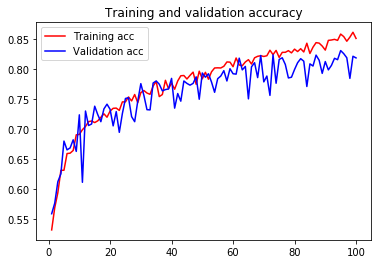

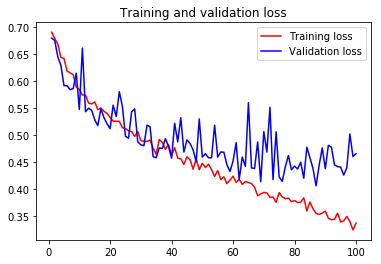

In [33]:
plt.plot(epochs, acc, 'r', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label ='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Thanks to data augmentation and dropout, you're no longer overfitting: the training curves are closely tracking the validation curves. You now reach an accuracy of 82%, a 15% relative improvement over the non-regularized model.